In [ ]:
import re
import string
import pandas as pd

import csv
import json
import glob

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def make_one_df(path):
    pandas_csv = pd.read_csv(path+'ann', delimiter='\t', header=None, names=['type', 'label_and_num', 'entitity'])
    
    df = pandas_csv.drop(pandas_csv.index[pandas_csv['type'].str.startswith('R')])
    # try:
    tmp = pd.DataFrame(df['label_and_num'].str.split(' ',1).tolist(),
                    columns = ['label','num'], index=df.index)
    tmp['num'] = tmp['num'].str.split(' |;').apply(lambda x: [int(i) for i in x])
    df['label'] = tmp['label']
    df['num'] = tmp['num']
    # except:
    #   pass
    return df


def df_process_folder(path_dir, folder_name):
  nerel_names = glob.glob(f"{path_dir}/{folder_name}/*ann")
  for i in range(len(nerel_names)):
    nerel_names[i] = nerel_names[i][:-3]
  res = make_one_df(nerel_names[0])
  for name in nerel_names[1:]:
    res = res.append(make_one_df(name))
  return res


path = "/content/drive/MyDrive/Diploma_paper/NEREL_01"
df_dev = df_process_folder(path, "dev")
df_test = df_process_folder(path, "test")
df_train = df_process_folder(path, "train")

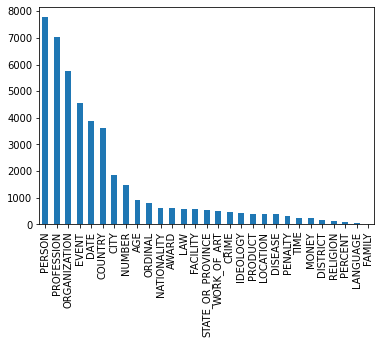

In [ ]:
df_train['label'].value_counts().plot.bar()

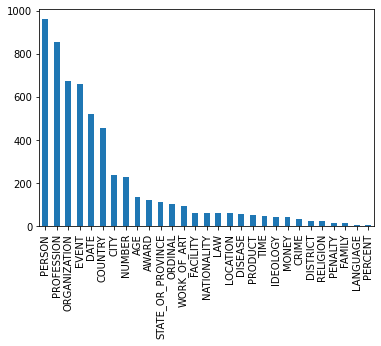

In [ ]:
df_test['label'].value_counts().plot.bar()

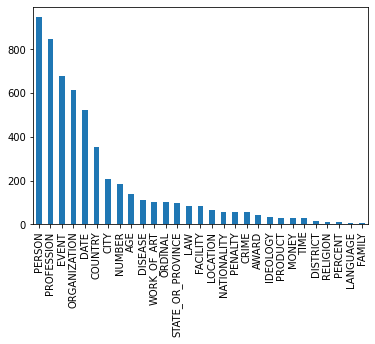

In [ ]:
df_dev['label'].value_counts().plot.bar()

In [ ]:
def make_len_column(df):
  len_list = df['num'].tolist()
  for i in range(0,len(len_list)):
    len_list[i] = len_list[i][1] - len_list[i][0]
  df['len'] = len_list
  return df

for i in [df_dev, df_train, df_test]:
  i = make_len_column(i)

In [ ]:
res_dev ={}
for i in df_dev['label'].unique():
  res_dev[i] = df_dev['len'].loc[df_dev['label'] == i].mean()

res_train ={}
for i in df_train['label'].unique():
  res_train[i] = df_train['len'].loc[df_train['label'] == i].mean()


res_test ={}
for i in df_test['label'].unique():
  res_test[i] = df_test['len'].loc[df_test['label'] == i].mean()

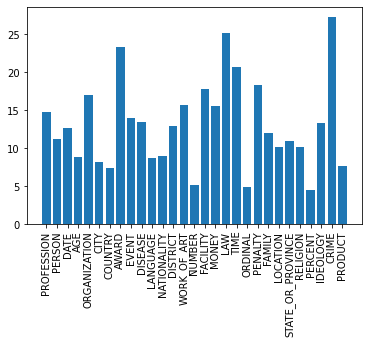

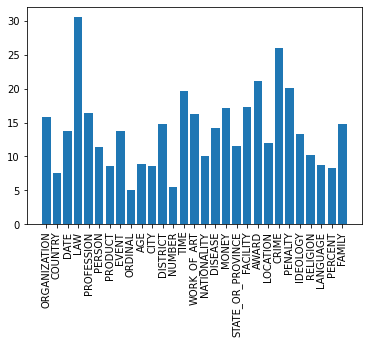

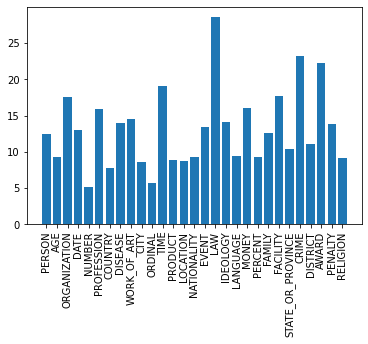

In [ ]:
 for i in [res_dev, res_train, res_test]:
  names = list(i.keys())
  values = list(i.values())

  plt.bar(range(len(res)), values, tick_label=names)
  plt.xticks(range(len(res)), names, rotation='vertical')
  plt.show()

